In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\rating.csv\rating.csv")


In [3]:
anime=pd.read_csv(r"C:\Users\ASUS\Downloads\rating.csv\anime.csv")


In [4]:
df = pd.merge(df,anime.drop('rating',axis=1),on='anime_id')

In [5]:
df.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,178553
2,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,158772
3,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,623511
4,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,84395


In [6]:
df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
Choegang Top Plate                                                  10.000000
STAR BEAT!: Hoshi no Kodou                                          10.000000
Shiroi Zou                                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Doukyuusei                                                           9.000000
Steins;Gate 0                                                        8.500000
Kimi no Na wa.                                                       8.297863
Name: rating, dtype: float64

In [7]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [8]:
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [9]:
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


(0.0, 3000.0)

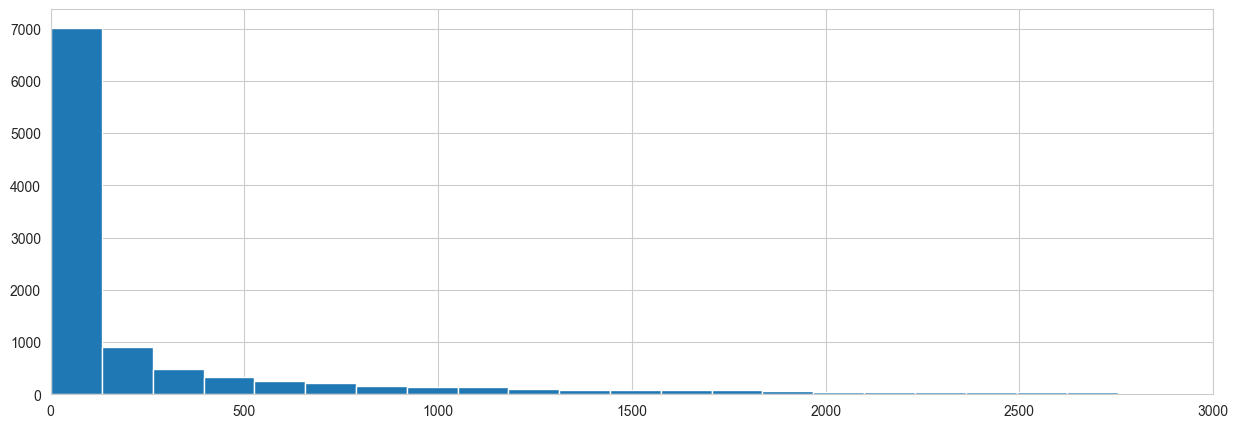

In [55]:
plt.figure(figsize=(15,5))
ratings['num of ratings'].hist(bins=300)
plt.xlim(0,3000)


<Axes: >

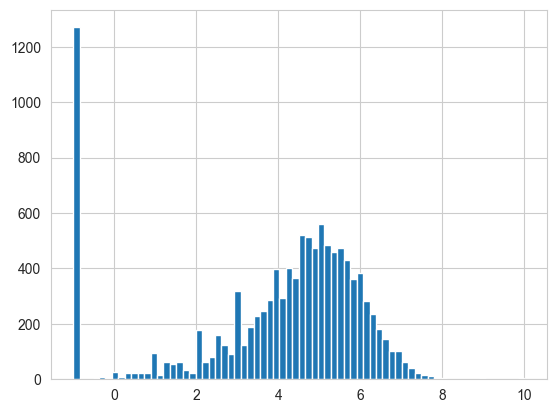

In [11]:

ratings['rating'].hist(bins=70)

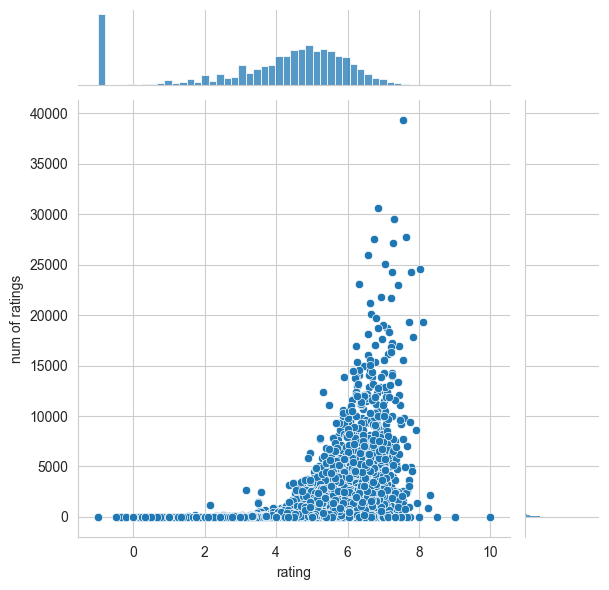

In [12]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)




In [32]:
def check_genre(genre_list,string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False
    
def get_recommendation(name):
    #generating list of anime with the same genre with target
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(
        lambda x: check_genre(anime_genre,str(x)))]['name'].tolist()
    
    #create matrix based on generated list
    animemat = df[df['name'].isin(cols)].pivot_table(
        index='user_id',columns='name',values='rating')
       
    #create correlation table
    anime_user_rating = animemat[name]
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values(
        'correlation',ascending=False)
    
    return corr_anime.head(10)

In [28]:
get_recommendation('Death Note')

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,num of ratings
name,,
Death Note,1.000000,39340
Claymore,0.713321,12254
Higurashi no Naku Koro ni Kai,0.708664,9167
Beelzebub,0.707432,5871
Darker than Black: Kuro no Keiyakusha,0.705980,15591
Blood+,0.705211,7496
Soul Eater,0.702571,19759
Ga-Rei: Zero,0.698991,5351
Higurashi no Naku Koro ni,0.695316,12901


In [46]:
get_recommendation('Akira')


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,num of ratings
name,,
Akira,1.000000,9748
Haiyore! Nyaruko-san,0.717407,5137
Cowboy Bebop: Tengoku no Tobira,0.713501,6927
Ghost in the Shell,0.707862,8945
Afro Samurai,0.697329,6412
Ano Natsu de Matteru,0.685767,6127
Kaze no Tani no Nausicaä,0.683735,7109
Rozen Maiden,0.682694,5824
Black Lagoon: The Second Barrage,0.676953,9735


In [51]:
get_recommendation('City Hunter')

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,correlation,num of ratings
name,,
Danshi Koukousei no Nichijou,0.885356,8190
Freezing,0.869877,6660
Ore no Imouto ga Konnani Kawaii Wake ga Nai.,0.865175,8354
Mayo Chiki!,0.854332,7879
Sekirei: Pure Engagement,0.847641,5221
Sora no Otoshimono: Forte,0.844617,6601
Motto To LOVE-Ru,0.840865,5762
Watashi ga Motenai no wa Dou Kangaetemo Omaera ga Warui!,0.839151,8244
Sora no Otoshimono,0.835049,8765
